## __Installing Libraries__

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors



# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [2]:
!pip install geocoder
!pip install folium

     |████████████████████████████████| 102kB 6.3MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 829kB 8.2MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future


## __Reading the data files__

>## Playgrounds in the Canberra

In [3]:
df = pd.read_csv("Town_And_District_Playgrounds.csv")
df.head()

,ASSET_ID,LOCATION,DIVISION_NAME,LATITUDE,LONGITUDE,Location_1
0,Plgr492,Garryowen Drive District Park,Acton,-35.292273,149.101138,"(-35.292273, 149.101138)"
1,Plgr1,Paterson Street Neighbourhood Park,Ainslie,-35.268805,149.141571,"(-35.268805, 149.141571)"
2,Plgr475,Bizant Street Neighbourhood Park,Amaroo,-35.173730,149.135224,"(-35.17373, 149.135224)"
3,Plgr195,Telopea Park,Barton,-35.315086,149.137312,"(-35.315086, 149.137312)"
4,Plgr533,Townsend Place District Park,Belconnen,-35.236067,149.074995,"(-35.236067, 149.074995)"


In [4]:
df.columns = ['Asset ID','Location','Suburb','Latitude','Longitude','GPS Location']
df.columns

Index(['Asset ID', 'Location', 'Suburb', 'Latitude', 'Longitude',
       'GPS Location'],
      dtype='object')

In [5]:
print("Size of the table for No.of Playgrounds in Canberra:")
df.shape

Size of the table for No.of Playgrounds in Canberra:


(73, 6)

>##  Total Population in Canberra

In [6]:
df1 = pd.read_csv("AUS_PPL_2020.csv")
df1.head()

,SUBURB,FEMALES(KIDS),FEMALES(TEENS),FEMALES(ADULTS),TOTAL FEMALES,MALES(KIDS),MALES(TEENS),MALE(ADULTS),TOTAL MALES,TOTAL
0,ACT East,33,32,283,348,47,42,426,515,863
1,ACT South West,1033,223,4259,5515,1028,220,4337,5585,11100
2,Acton,47,228,902,1177,69,222,1020,1311,2488
3,Ainslie,418,190,2206,2814,380,187,1982,2549,5363
4,Amaroo,694,312,2207,3213,568,314,2010,2892,6105


In [7]:
df1.columns = ['Suburb','Females(KIDS)','Females(TEENS)','Females(ADULTS)','Total Females','Males(KIDS)','Males(TEENS)','Males(ADULTS)','Total Males','Total']
df1.columns

Index(['Suburb', 'Females(KIDS)', 'Females(TEENS)', 'Females(ADULTS)',
       'Total Females', 'Males(KIDS)', 'Males(TEENS)', 'Males(ADULTS)',
       'Total Males', 'Total'],
      dtype='object')

In [8]:
print("Size of the table for Current Population in Canberra in each discrict:")
df1.shape

Size of the table for Current Population in Canberra in each discrict:


(110, 10)

## __Foursquare API__

In [9]:
CLIENT_ID = 'Z4C1VTKABZZ0AHL53J05KLPIQY4WVYU1M3UB352WFTI21SLR' # my Foursquare ID
CLIENT_SECRET = 'S35NLJ4HCXMH0QRVFDSJGDD02Q3JR43NUI0AZVSAPZZRURYI' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z4C1VTKABZZ0AHL53J05KLPIQY4WVYU1M3UB352WFTI21SLR
CLIENT_SECRET: S35NLJ4HCXMH0QRVFDSJGDD02Q3JR43NUI0AZVSAPZZRURYI


In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Street', 
                  'Street Latitude', 
                  'Street Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
getNearbyVenues

<function __main__.getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100)>

In [11]:
location_venues = getNearbyVenues(names=df['Suburb'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                
                                  )

Acton
Ainslie
Amaroo
Barton
Belconnen
Belconnen
Belconnen
Bonython
Chapman
Chifley
City
Conder
Cook
Crace
Dickson
Downer
Dunlop
Evatt
Evatt
Fadden
Florey
Forde
Forde
Forde
Franklin
Fraser
Gordon
Gowrie
Greenway
Greenway
Greenway
Greenway
Gungahlin
Gungahlin
Hackett
Hall
Harrison
Hawker
Holder
Holt
Isaacs
Kambah
Kambah
Kambah
Kingston
Latham
Lawson
Lyneham
Macarthur
Macquarie
Mawson
Melba
Moncrieff
Narrabundah
Ngunnawal
Oaks Estate
O'connor
O'malley
Palmerston
Phillip
Red Hill
Reid
Rivett
Spence
Stirling
Taylor
Throsby
Torrens
Turner
Wanniassa
Weston
Yarralumla
Yarralumla


## __Data Visualization__

>## Map of Canberra

In [12]:
address = 'Canberra, Australia'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Canberra are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Canberra are -35.2975906, 149.1012676.


In [13]:
# create map of Canberra using latitude and longitude values
map_canb = folium.Map(location=[latitude, longitude], zoom_start=11)
map_canb

>## Parks Location in Canberra

In [14]:
# create map of Canberra with parks marked using latitude and longitude values
map_can_park = folium.Map(location=[latitude, longitude], zoom_start=11)

 #add markers to map
for lat, lng, Suburb in zip(df['Latitude'], df['Longitude'], df['Suburb']):
    label = ' {}'.format(Suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_can_park)  
    
map_can_park

>## Bar Chart of Suburb Population

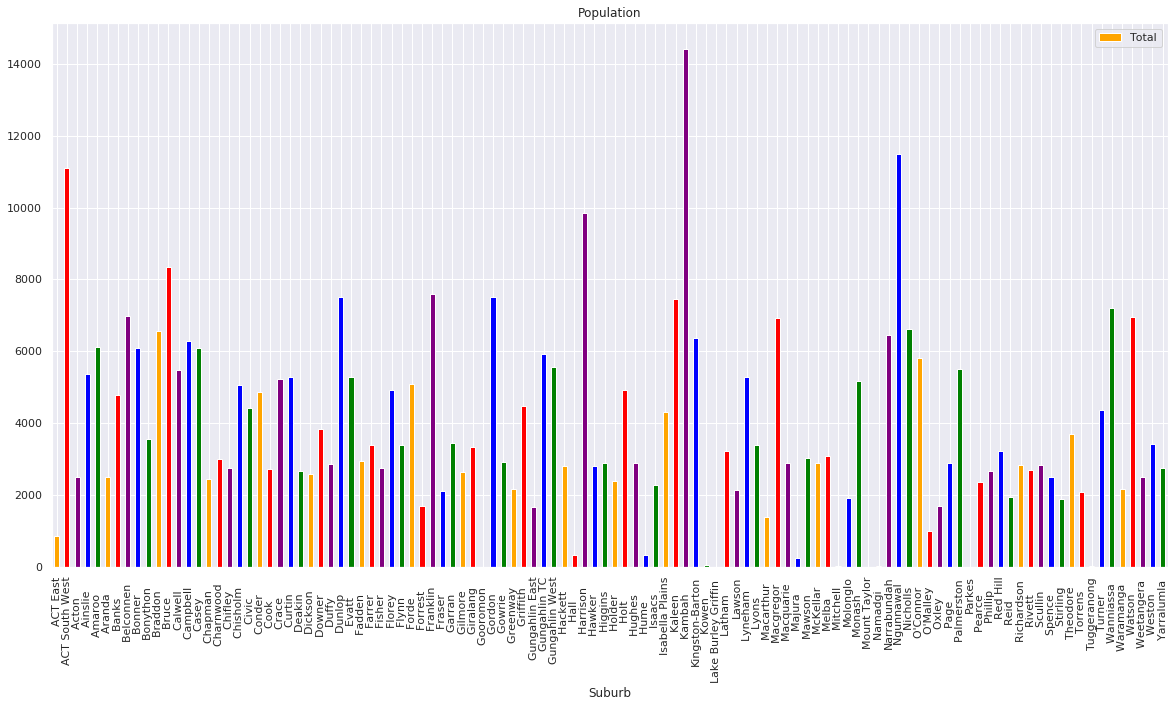

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


df1.plot.bar(x="Suburb", y="Total", rot=90, title="Population", color = ['orange','red','purple','blue','green'], figsize=(20,10), fontsize=(11))
plt.show()

### With the above graph we can see the 20 most populated areas are 
- Kambah
- Ngunnawal
- ACT South West
- Harrison 
- Bruce     
- Franklin   
- Dunlop     
- Gordon     
- Kaleen     
- Wanniassa  
- Belconnen  
- Watson     
- Macgregor  
- Nicholls   
- Braddon    
- Narrabundah
- Kingston-Barton
- Campbell   
- Amaroo     
- Casey      


>## Map Locating the top most populated Suburbs

In [19]:
#Data file of most populated Suburbs with Latitudes and Longitudes
df3 = pd.read_csv("sub_cord.csv")
df3

,Suburb,Latitude,Longitude
0,Kambah,-35.394790,149.070860
1,Ngunnawal,-35.170066,149.110225
2,ACT South West,-35.282570,149.132280
3,Harrison,-35.201285,149.150435
4,Bruce,-35.242453,149.078263
5,Franklin,-35.202736,149.132863
6,Dunlop,-35.199553,149.019446
7,Gordon,-35.450420,149.083929
8,Kaleen,-35.219672,149.102516
9,Wanniassa,-35.401691,149.098756


In [20]:
df3.columns = ['Suburb','Latitude','Longitude',]
df3.columns

Index(['Suburb', 'Latitude', 'Longitude'], dtype='object')

In [21]:
# create map of 20 most populated Suburbs in Canberra using latitude and longitude values
map_sub_cord = folium.Map(location=[latitude, longitude], zoom_start=11)

 #add markers to map
for lat, lng, Suburb in zip(df3['Latitude'], df3['Longitude'], df3['Suburb']):
    label = ' {}'.format(Suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sub_cord)  
    
map_sub_cord

>## Map of Most Populated Suburbs and Parks

In [22]:
# create map of Canberra with parks and populated Suburbs using latitude and longitude values
map_comb = folium.Map(location=[latitude, longitude], zoom_start=11)

 #add markers to map
for lat, lng, Suburb in zip(df3['Latitude'], df3['Longitude'], df3['Suburb']):
    label = ' {}'.format(Suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_comb)  

 #add markers to map
for lat, lng, Suburb in zip(df['Latitude'], df['Longitude'], df['Suburb']):
    label = ' {}'.format(Suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_comb)      
    
    
map_comb

# __Conclusion__
## Populated Suburbs with no Parks
By analysing more closely, we can see 10 of the most populated Suburbs dont have parks. Those are
- Wanniassa
- Narrabundah
- Nicholls
- Macgregor
- Kaleen
- Casey
- Campbell
- Braddon
- Watson
- Ngunnawal

Hence we can construct Parks in these areas. Making it easier for the citizens to enjoy the weather, go out for picnics with kids running around, stay fit by jogging or working out and relax after a hard day at work.

## Acknowledgement
I have taken efforts in this project. However, it would not have been possible without the kind support and help of many individuals and organizations. I would like to extend my sincere thanks to all of them.
I am highly indebted to IBM for their guidance for providing necessary information regarding the project & also for their support in completing the project.
I would like to express my gratitude towards my mentors of IBM Data Science Professional Certificate, Mr. Alex Aklson, Mr. Polong Lin, Mr. Romeo Kienzler, Mrs. Svetlana Levitan, Mr. Joseph Santarcangelo, Mr. Rav Ahuja and Mr. Saeed Aghabozorgi for their kind co-operation and encouragement which help me in completion of this project.
My thanks and appreciations also go to my family and friends in developing the project and people who have willingly helped me out with their abilities.


# The End!
# Thank You!